# Predicting Taxa with Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

from micropyome.taxa import regression

## Obtain Data

In [2]:
DATASET_PATH = "data/averill_processed/bacteria/"

In [3]:
X = {}
Y = {}
for level in regression.TAXONOMIC_LEVELS:
    x = pd.read_csv(f"{DATASET_PATH}{level}/15_variables.csv")
    if level == 'fg':
        y = pd.read_csv(f"{DATASET_PATH}{level}/observed.csv")
    else:
        y = pd.read_csv(f"{DATASET_PATH}{level}/y_11groupTaxo.csv")

    x = x.drop(x.columns[0], axis=1)
    # x = StandardScaler().fit_transform(x)
    y = y.drop(y.columns[0], axis=1)

    X[level] = x
    Y[level] = y

In [4]:
X["fg"].head()

,latitude,longitude,depth_max,forest,map,map_sd,mat,mat_sd,map_CV,mat_CV,mdr,aridity,NPP,relEM,pH
0,53.444053,-2.214306,10.0,0,0.831,0.048290,9.633333,1.257395,18.28125,450.486266,7.25,1.381,0.675,0.898121,7.65
1,53.444053,-2.214306,10.0,0,0.831,0.046998,9.633333,1.217851,18.28125,450.486266,7.25,1.381,0.675,0.898121,7.67
2,53.444053,-2.214306,10.0,0,0.831,0.048770,9.633333,1.222167,18.28125,450.486266,7.25,1.381,0.675,0.898121,7.45
3,53.444053,-2.214306,10.0,0,0.831,0.048297,9.633333,1.263030,18.28125,450.486266,7.25,1.381,0.675,0.898121,7.56
4,53.444053,-2.214306,10.0,0,0.831,0.047610,9.633333,1.265757,18.28125,450.486266,7.25,1.381,0.675,0.898121,7.64


In [5]:
Y["fg"].head()

,other,assim_nitrate_reduction,assim_nitrite_reduction,cellulolytic,chitinolytic,copiotroph,denitrification,dissim_nitrate_reduction,dissim_nitrite_reduction,lignolytic,methanotroph,n_fixation,nitrification,oligotroph
0,0.893046,0.000957,0.002588,0.002595,0.002333,0.037817,0.003547,0.003358,0.005295,0.002366,0.000083,0.006273,0.000286,0.039454
1,0.889777,0.000788,0.004186,0.001942,0.002881,0.035736,0.003214,0.004851,0.004819,0.001714,0.000155,0.006312,0.000527,0.043100
2,0.848038,0.002428,0.006368,0.006620,0.003244,0.053938,0.008511,0.013298,0.005656,0.000937,0.000637,0.013354,0.000244,0.036729
3,0.866138,0.003326,0.004454,0.002900,0.003436,0.044006,0.005105,0.008007,0.008106,0.001687,0.000110,0.013447,0.000876,0.038404
4,0.885077,0.001408,0.000693,0.003014,0.001311,0.021446,0.004757,0.004836,0.004989,0.000560,0.000360,0.008940,0.000809,0.061803


## Create and Train Models

In [6]:
models = {
    "k-NN": KNeighborsRegressor(20),
    "Linear Regression": LinearRegression(),
    #  "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": MultiOutputRegressor(GradientBoostingRegressor()),
}

In [7]:
results = regression.evaluate_models_multiple_taxa(models, X, Y, "other", 0.01, 5)

2024-05-12T17:10:18.538859 > INFO Evaluating 4 models with 5 splits.
2024-05-12T17:10:18.540879 > INFO Level: fg
2024-05-12T17:10:18.543395 > INFO K-fold split: 0
2024-05-12T17:10:18.547149 > INFO Beginning the evaluation of 4 models.
2024-05-12T17:10:18.573255 >     Evaluated the model `k-NN`.
2024-05-12T17:10:18.665811 >     Evaluated the model `Linear Regression`.
2024-05-12T17:10:19.674237 >     Evaluated the model `Random Forest`.
2024-05-12T17:10:22.862260 >     Evaluated the model `Gradient Boosting`.
2024-05-12T17:10:22.864567 > INFO K-fold split: 1
2024-05-12T17:10:22.868426 > INFO Beginning the evaluation of 4 models.
2024-05-12T17:10:22.887639 >     Evaluated the model `k-NN`.
2024-05-12T17:10:22.940108 >     Evaluated the model `Linear Regression`.
2024-05-12T17:10:23.972406 >     Evaluated the model `Random Forest`.
2024-05-12T17:10:27.092683 >     Evaluated the model `Gradient Boosting`.
2024-05-12T17:10:27.094309 > INFO K-fold split: 2
2024-05-12T17:10:27.094309 > INFO B

In [8]:
averill_results = pd.read_csv(f"{DATASET_PATH}/r2_published_results.csv")
published_results = averill_results.iloc[0].to_list()[1:]

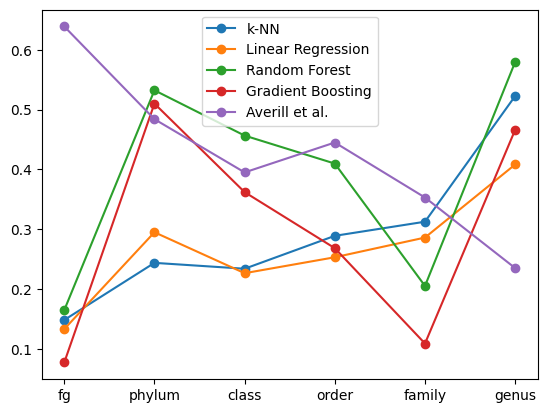

In [9]:
x = list(range(len(regression.TAXONOMIC_LEVELS)))

for model in models:
    y = [results[level][model] for level in regression.TAXONOMIC_LEVELS]
    plt.plot(x, y, "-o", label=model)

plt.plot(x, published_results, "-o", label="Averill et al.")
plt.xticks(x, regression.TAXONOMIC_LEVELS)
plt.legend()
plt.show()

## Multilayer Perceptron

In [10]:
raise RuntimeError

RuntimeError: 

In [ ]:
from torch import nn, tensor, utils, optim

In [ ]:
def create_mlp(n_features: int, n_targets: int) -> nn:
    return nn.Sequential(
        nn.Linear(n_features, n_features),
        nn.ReLU(),
        nn.Linear(n_features, n_targets),
        nn.ReLU(),
        nn.Linear(n_targets, n_targets),
        nn.Softmax()
    )

In [ ]:
x_train = datasets["fg"]["x_train"].values
y_train = datasets["fg"]["y_train"].values
x_test = datasets["fg"]["x_test"].values
y_test = datasets["fg"]["y_test"].values

In [ ]:
trainloader = utils.data.DataLoader(
    [(x, y) for x, y in zip(x_train, y_train)], batch_size=4
)
testloader = utils.data.DataLoader(
    [(x, y) for x, y in zip(x_test, y_test)], batch_size=4
)

In [ ]:
mlp = create_mlp(len(x_train[0]), len(y_train[0]))

loss_function = nn.L1Loss()
optimizer = optim.Adagrad(mlp.parameters(), lr=1e-4)

In [ ]:
for epoch in range(10):
    current_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        if i%100 == 0:
            print(f'Loss after mini-batch %5d: %.3f'%(i+1, current_loss/500))
            current_loss = 0.0

    print(f'Epoch {epoch+1} finished')

print("Training has completed")

d:\stage\micropyome\venv\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Loss after mini-batch     1: 0.000
Loss after mini-batch   101: 0.028
Loss after mini-batch   201: 0.028
Loss after mini-batch   301: 0.028
Epoch 1 finished
Loss after mini-batch     1: 0.000
Loss after mini-batch   101: 0.028
Loss after mini-batch   201: 0.028
Loss after mini-batch   301: 0.028
Epoch 2 finished
Loss after mini-batch     1: 0.000
Loss after mini-batch   101: 0.028
Loss after mini-batch   201: 0.028
Loss after mini-batch   301: 0.028
Epoch 3 finished
Loss after mini-batch     1: 0.000
Loss after mini-batch   101: 0.028
Loss after mini-batch   201: 0.028
Loss after mini-batch   301: 0.028
Epoch 4 finished
Loss after mini-batch     1: 0.000
Loss after mini-batch   101: 0.028
Loss after mini-batch   201: 0.028
Loss after mini-batch   301: 0.028
Epoch 5 finished
Loss after mini-batch     1: 0.000
Loss after mini-batch   101: 0.028
Loss after mini-batch   201: 0.028
Loss after mini-batch   301: 0.028
Epoch 6 finished
Loss after mini-batch     1: 0.000
Loss after mini-batch  

In [ ]:
from torch import no_grad, Tensor
from sklearn.metrics import mean_squared_error, r2_score

mlp.eval()
with no_grad():
    outputs = mlp(Tensor(x_test))
    predicted_labels = outputs.squeeze().tolist()

test_targets = np.array(y_test)

print(predicted_labels[0])
print(y_test[0])

mse = mean_squared_error(test_targets, predicted_labels)
r2 = r2_score(test_targets, predicted_labels)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

[1.486986294637202e-18, 1.2070863419921807e-07, 4.3906808744331727e-11, 4.295309385948798e-10, 4.248475761414738e-06, 3.1383749765634406e-11, 0.037356335669755936, 2.898805639972579e-10, 0.017729345709085464, 1.7933316507137698e-12, 0.9449098110198975, 1.7787057937646011e-10, 3.1311862824789927e-12, 3.597061537519153e-10]
[8.68392e-01 4.11007e-03 4.40389e-03 3.29407e-03 4.33941e-03 4.93889e-02
 5.34058e-03 9.18113e-03 8.82886e-03 2.14970e-03 2.23470e-04 8.08423e-03
 9.62682e-04 3.12994e-02]
Mean Squared Error: 0.11030234316170076
R2 Score: -227907.00341952694


## Dirichlet Multivariate Regression Model

In [ ]:
import arviz as az
import numpy as np
import pymc as pm
import scipy as sp

In [ ]:
rng = np.random.default_rng(16)
true_conc = 6.0
true_frac = np.array([0.45, 0.30, 0.15, 0.09, 0.01])
trees = ["pine", "oak", "ebony", "rosewood", "mahogany"]  # Tree species observed
# fmt: off
forests = [  # Forests observed
    "sunderbans", "amazon", "arashiyama", "trossachs", "valdivian",
    "bosc de poblet", "font groga", "monteverde", "primorye", "daintree",
]
# fmt: on
k = len(trees)
n = len(forests)
total_count = 50

true_p = sp.stats.dirichlet(true_conc * true_frac).rvs(size=n, random_state=rng)
observed_counts = np.vstack(
    [sp.stats.multinomial(n=total_count, p=p_i).rvs(random_state=rng) for p_i in true_p]
)

observed_counts

array([[18, 19,  5,  8,  0],
       [ 6, 13,  4, 27,  0],
       [16, 21, 13,  0,  0],
       [18, 16,  1, 15,  0],
       [25, 15,  8,  2,  0],
       [16, 29,  4,  1,  0],
       [14, 15,  4, 17,  0],
       [10,  6, 30,  4,  0],
       [30,  8,  4,  8,  0],
       [16, 25,  5,  4,  0]], dtype=int64)

In [ ]:
coords = {"tree": trees, "forest": forests}  # Input variables.
with pm.Model(coords=coords) as model_multinomial:
    frac = pm.Dirichlet("frac", a=np.ones(k), dims="tree")  # Expected fractions (i.e. output).
    counts = pm.Multinomial(
        "counts", n=total_count, p=frac, observed=observed_counts, dims=("forest", "tree")
    )

In [ ]:
with model_multinomial:
    trace_multinomial = pm.sample(chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [frac]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.


array([[<Axes: title={'center': 'frac'}>,
        <Axes: title={'center': 'frac'}>]], dtype=object)

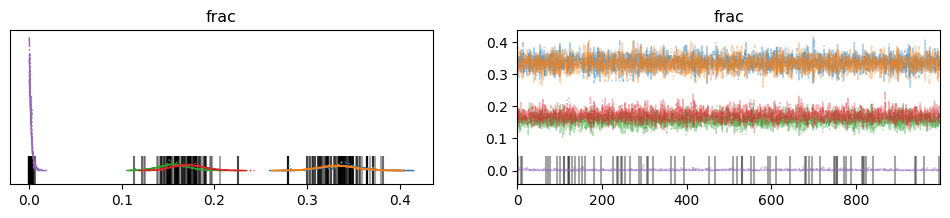

In [ ]:
az.plot_trace(data=trace_multinomial, var_names=["frac"])

In [ ]:
with model_multinomial:
    like = pm.compute_log_likelihood(trace_multinomial)

print(like)

Output()

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data


In [ ]:
print(vars(like))

{'_groups': ['posterior', 'log_likelihood', 'sample_stats', 'observed_data'], '_groups_warmup': [], '_attrs': {}, 'posterior': <xarray.Dataset> Size: 164kB
Dimensions:  (chain: 4, draw: 1000, tree: 5)
Coordinates:
  * chain    (chain) int32 16B 0 1 2 3
  * draw     (draw) int32 4kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * tree     (tree) <U8 160B 'pine' 'oak' 'ebony' 'rosewood' 'mahogany'
Data variables:
    frac     (chain, draw, tree) float64 160kB 0.3529 0.3235 ... 0.1664 0.002933
Attributes:
    created_at:                 2024-05-10T03:20:29.231570+00:00
    arviz_version:              0.18.0
    inference_library:          pymc
    inference_library_version:  5.14.0
    sampling_time:              39.38974857330322
    tuning_steps:               1000, 'sample_stats': <xarray.Dataset> Size: 492kB
Dimensions:                (chain: 4, draw: 1000)
Coordinates:
  * chain                  (chain) int32 16B 0 1 2 3
  * draw                   (draw) int32 4kB 0 1 2 3 4 5 ...